In [ ]:
!pip install Conv2D
!pip install Activation
!pip install Flatten
!pip install Dense
!pip install Maxpooling2D
!pip install Sequential
from keras import backend as K

ERROR: Could not find a version that satisfies the requirement Conv2D (from versions: none)
ERROR: No matching distribution found for Conv2D
  Preparing metadata (setup.py) ... done
  Created wheel for Activation: filename=activation-0.1.0-py2.py3-none-any.whl size=4068 sha256=526521d279e80990b6ee7cc407e2fc18236fbd28ab9f4b164c3b17fab43ec3c6
  Stored in directory: /root/.cache/pip/wheels/63/f0/9a/7e80c8e0b5790ec5970143e6357cf23a1a7fdc82da12e30774
Successfully built Activation
ERROR: Could not find a version that satisfies the requirement Flatten (from versions: none)
ERROR: No matching distribution found for Flatten
ERROR: Could not find a version that satisfies the requirement Dense (from versions: none)
ERROR: No matching distribution found for Dense
ERROR: Could not find a version that satisfies the requirement Maxpooling2D (from versions: none)
ERROR: No matching distribution found for Maxpooling2D
  Preparing metadata (setup.py) ... done
  Created wheel for Sequential: filename=seq

In [ ]:
class LeNet:
	@staticmethod
	def build(numChannels, imgRows, imgCols, numClasses,
		activation="relu", weightsPath=None):
		# initialize the model
		model = Sequential()
		inputShape = (imgRows, imgCols, numChannels)
		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (numChannels, imgRows, imgCols)

In [ ]:
model.add(Conv2D(20, 5, padding="same",
			input_shape=inputShape))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

NameError: name 'model' is not defined

In [ ]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

class LeNet:
	@staticmethod
	def build(numChannels, imgRows, imgCols, numClasses,
		activation="relu", weightsPath=None):
		# initialize the model
		model = Sequential()
		inputShape = (imgRows, imgCols, numChannels)
		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (numChannels, imgRows, imgCols)

		model.add(Conv2D(20, 5, padding="same",
			input_shape=inputShape))
		model.add(Activation(activation))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# The following line was incorrectly indented
		model.add(Conv2D(50, 5, padding="same")) # Fixed indentation
		model.add(Activation(activation))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# Ensure consistent indentation for the following lines:
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation(activation))
		# define the second FC layer
		model.add(Dense(numClasses))
		# lastly, define the soft-max classifier
		model.add(Activation("softmax"))
		# Fixed indentation here to align with the build method's indentation
		if weightsPath is not None:
			model.load_weights(weightsPath)

		return model # return the model

In [ ]:
!pip install LeNet
!pip install np_utils



from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.optimizers import SGD

from keras import backend as K
import numpy as np
import argparse
import cv2

ERROR: Could not find a version that satisfies the requirement LeNet (from versions: none)
ERROR: No matching distribution found for LeNet


In [ ]:
import argparse

# Mock the command-line arguments to avoid SystemExit
# This allows the script to run without errors in the notebook
import sys
sys.argv = ['']

ap = argparse.ArgumentParser()
ap.add_argument("-s", "--save-model", type=int, default=-1,
    help="(optional) whether or not model should be saved to disk")
ap.add_argument("-l", "--load-model", type=int, default=-1,
    help="(optional) whether or not pre-trained model should be loaded")
ap.add_argument("-w", "--weights", type=str,
    help="(optional) path to weights file")
args = vars(ap.parse_args())

In [ ]:
# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] downloading MNIST...")
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
	testData = testData.reshape((testData.shape[0], 1, 28, 28))
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
	testData = testData.reshape((testData.shape[0], 28, 28, 1))
# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

[INFO] downloading MNIST...


In [ ]:
import numpy as np

In [ ]:
with np.load("mnist.npz") as data:
    # Access the arrays within the .npz file
    train_images = data['x_train']
    train_labels = data['y_train']
    test_images = data['x_test']
    test_labels = data['y_test']

# Now you can work with the loaded data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
!pip install np_utils
!apt-get -qq install -y keras.utils-dev && pip install -U keras.utils
# Import to_categorical directly from tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

trainLabels = to_categorical(trainLabels, 10)
testLabels = to_categorical(testLabels, 10)

model = LeNet.build(numChannels=1, imgRows=28, imgCols=28,
	numClasses=10,
	weightsPath=args["weights"] if args["load_model"] > 0 else None)
model.compile(loss="categorical_crossentropy",
	metrics=["accuracy"])

E: Unable to locate package keras.utils-dev
E: Couldn't find any package by glob 'keras.utils-dev'
E: Couldn't find any package by regex 'keras.utils-dev'


In [ ]:
if args["load_model"] < 0:
    print("[INFO] training...")
    model.fit(trainData, trainLabels, batch_size=128, epochs=20,
              verbose=1)

    # show the accuracy on the testing set
    print("[INFO] evaluating...")
    (loss, accuracy) = model.evaluate(testData, testLabels,
                                     batch_size=128, verbose=1)
    print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))



[INFO] training...


NameError: name 'model' is not defined

In [ ]:
import argparse

# Mock the command-line arguments to avoid SystemExit
# This allows the script to run without errors in the notebook
import sys
sys.argv = ['']

ap = argparse.ArgumentParser()
ap.add_argument("-s", "--save-model", type=int, default=-1,
    help="(optional) whether or not model should be saved to disk")
ap.add_argument("-l", "--load-model", type=int, default=-1,
    help="(optional) whether or not pre-trained model should be loaded")
ap.add_argument("-w", "--weights", type=str,
    help="(optional) path to weights file")
args = vars(ap.parse_args())

# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] downloading MNIST...")
from keras.datasets import mnist
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
from keras import backend as K
if K.image_data_format() == "channels_first":
	trainData = trainData.reshape((trainData.shape[0], 1, 28, 28))
	testData = testData.reshape((testData.shape[0], 1, 28, 28))
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
	testData = testData.reshape((testData.shape[0], 28, 28, 1))
# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

# Import to_categorical directly from tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical
trainLabels = to_categorical(trainLabels, 10)
testLabels = to_categorical(testLabels, 10)

# Import LeNet class
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense

class LeNet:
	@staticmethod
	def build(numChannels, imgRows, imgCols, numClasses,
		activation="relu", weightsPath=None):
		# initialize the model
		model = Sequential()
		inputShape = (imgRows, imgCols, numChannels)
		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (numChannels, imgRows, imgCols)

		model.add(Conv2D(20, 5, padding="same",
			input_shape=inputShape))
		model.add(Activation(activation))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# The following line was incorrectly indented
		model.add(Conv2D(50, 5, padding="same")) # Fixed indentation
		model.add(Activation(activation))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# Ensure consistent indentation for the following lines:
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation(activation))
		# define the second FC layer
		model.add(Dense(numClasses))
		# lastly, define the soft-max classifier
		model.add(Activation("softmax"))
		# Fixed indentation here to align with the build method's indentation
		if weightsPath is not None:
			model.load_weights(weightsPath)

		return model # return the model

# Build and compile the model here
model = LeNet.build(numChannels=1, imgRows=28, imgCols=28,
	numClasses=10,
	weightsPath=args["weights"] if args["load_model"] > 0 else None)
# Compile the model
from keras.optimizers import SGD
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.01),
	metrics=["accuracy"])

if args["load_model"] < 0:
    print("[INFO] training...")
    model.fit(trainData, trainLabels, batch_size=128, epochs=3,
              verbose=1)

    # show the accuracy on the testing set
    print("[INFO] evaluating...")
    (loss, accuracy) = model.evaluate(testData, testLabels,
                                     batch_size=128, verbose=1)
    print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

[INFO] downloading MNIST...
[INFO] training...
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 107s 228ms/step - accuracy: 0.4916 - loss: 1.6787
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 244ms/step - accuracy: 0.9083 - loss: 0.3063
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 214ms/step - accuracy: 0.9385 - loss: 0.2087
[INFO] evaluating...
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9464 - loss: 0.1801
[INFO] accuracy: 95.38%


In [ ]:
if args["save_model"] > 0:
	print("[INFO] dumping weights to file...")
	model.save_weights(args["weights"], overwrite=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  44254      0 --:--:-- --:--:-- --:--:-- 44450


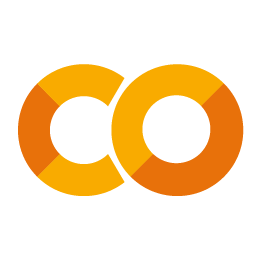

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[INFO] Predicted: 5, Actual: 5


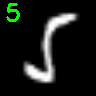

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[INFO] Predicted: 2, Actual: 2


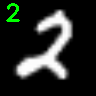

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[INFO] Predicted: 3, Actual: 3


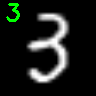

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[INFO] Predicted: 3, Actual: 3


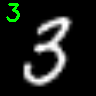

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[INFO] Predicted: 6, Actual: 1


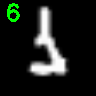

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[INFO] Predicted: 5, Actual: 5


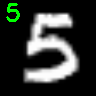

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[INFO] Predicted: 6, Actual: 6


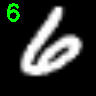

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[INFO] Predicted: 2, Actual: 2


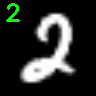

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[INFO] Predicted: 8, Actual: 8


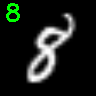

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[INFO] Predicted: 2, Actual: 2


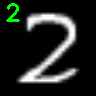

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow # Importing the correct function
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img) # Using cv2_imshow instead of cv2.imshow
# randomly select a few testing digits
for i in np.random.choice(np.arange(0, len(testLabels)), size=(10,)):
	# classify the digit
	probs = model.predict(testData[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	# extract the image from the testData if using "channels_first"
	# ordering
	if K.image_data_format() == "channels_first":
		image = (testData[i][0] * 255).astype("uint8")
	# otherwise we are using "channels_last" ordering
	else:
		image = (testData[i] * 255).astype("uint8")
	# merge the channels into one image
	image = cv2.merge([image] * 3)
	# resize the image from a 28 x 28 image to a 96 x 96 image so we
	# can better see it
	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
	# show the image and prediction
	cv2.putText(image, str(prediction[0]), (5, 20),
				cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
	print("[INFO] Predicted: {}, Actual: {}".format(prediction[0],
		np.argmax(testLabels[i])))
	cv2_imshow(image) # Using cv2_imshow instead of cv2.imshow
	cv2.waitKey(0)